In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv",sep = ',')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
df = df.replace('?', np.nan)

replacing '?' with nan 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

checking out the information of the dataset

In [5]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

checking out all the statistical tools across the columns

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

checking out the null values inside the dataframe

In [6]:
df.drop('_c39',axis = 1,inplace = True)

droping the unnecessary column

In [8]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

checking out all the columns

In [ ]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

cheking out the data types across the columns

In [7]:
# convert column to datetime pandas
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

converting 'policy blind date' column into datetime format

In [8]:
# Create new columns
df['day'] = df['policy_bind_date'].dt.day
df['month'] = df['policy_bind_date'].dt.month
df['year'] = df['policy_bind_date'].dt.year
df.drop('policy_bind_date',axis = 1,inplace = True)

extracting day month and year from the column policy bind date and making new columns inside the dataframe and deleting the original column

In [160]:
df['auto_make'].value_counts()

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [9]:
# convert column to datetime pandas
df['incident_date'] = pd.to_datetime(df['incident_date'])

converting 'incident_date' column into datetime format

In [10]:
# Create new columns
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year
df.drop('incident_date',axis = 1,inplace = True)

extracting day month and year from the column 'incident_date' and making new columns inside the dataframe and deleting the original column

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

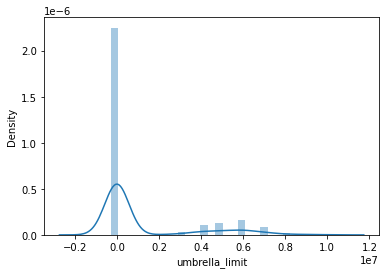

In [11]:
sns.distplot(df['umbrella_limit'])

ploting distplot to see the skewness

In [20]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

checking out the number of males and females

# Performing EDA

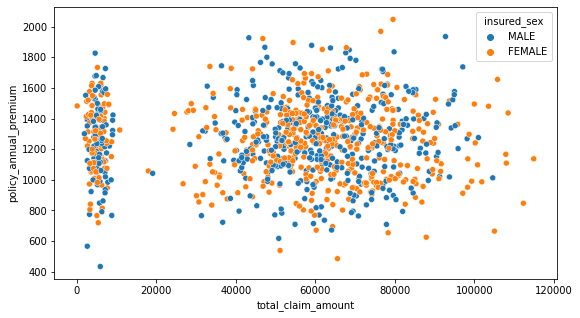

In [ ]:
# plotting a scatter plot
plt.figure(figsize=(9,5))
sns.scatterplot(data = df,x = 'total_claim_amount', y = 'policy_annual_premium',hue = 'insured_sex')

from the above figure we can infer that male and female both claims the amount between 45000 to 65000 and takes premium ploicies

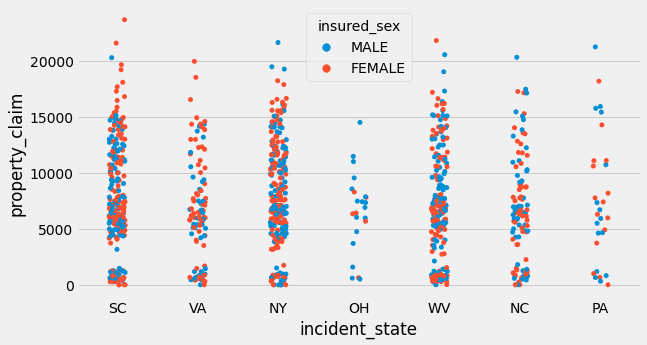

In [ ]:
plt.rcParams['figure.figsize'] = (9, 5)
sns.stripplot(x ='incident_state', y ='property_claim',hue = 'insured_sex',data = df)

from the above graph we can assume that state SC has the highest amount property claim and state OH has the lowest amount of peroperty claim.


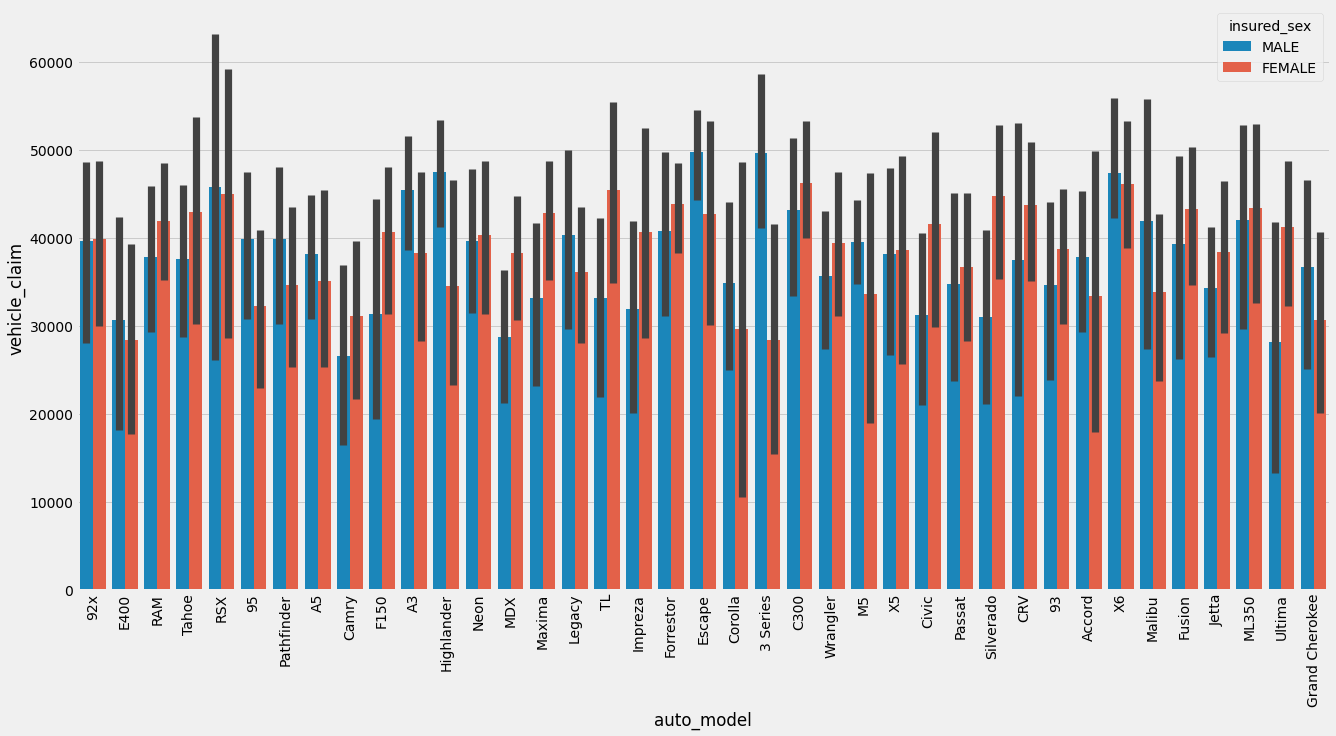

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.xticks(rotation=90)
sns.barplot(x = 'auto_model',y = 'vehicle_claim',data = df,hue = 'insured_sex')

from the above graph we can assume that males who drives RSX takes the most vehicle claims as compared to womens and males who drives MDX takes the lowest vehicle claims as compared to women

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'day', 'month', 'year'],
      dtype='object')

<AxesSubplot:xlabel='auto_year', ylabel='total_claim_amount'>

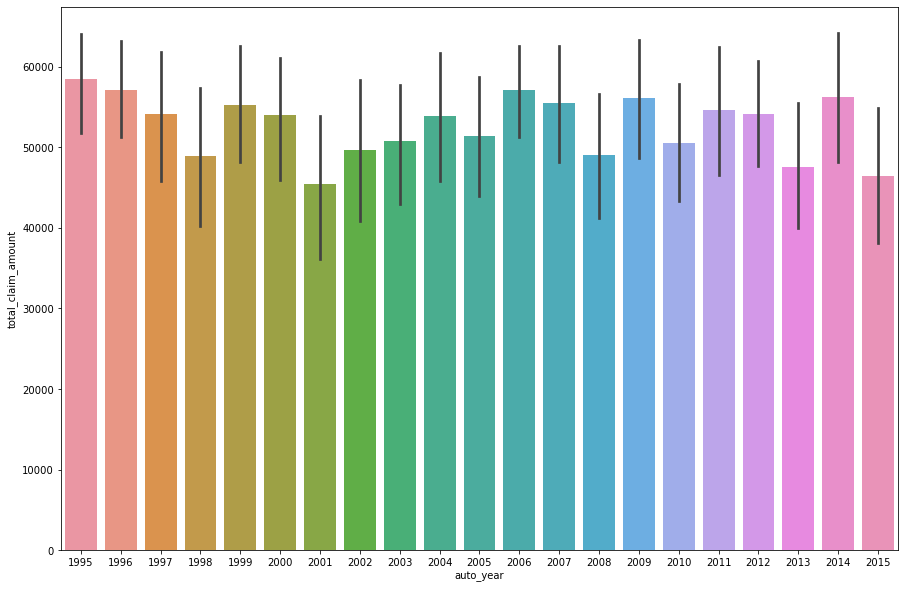

In [31]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.barplot(x = 'auto_year',y = 'total_claim_amount',data = df)

from the above figure we can assume that on 2004 the amount of total claim was high and in 2001 its low 

In [ ]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

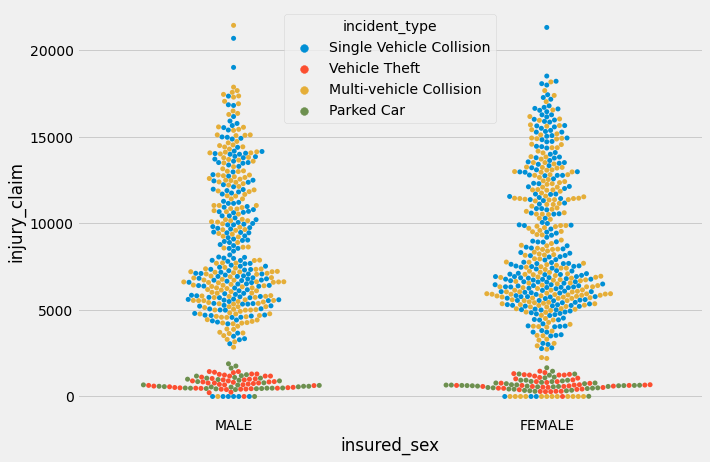

In [ ]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.swarmplot(x = 'insured_sex', y = 'injury_claim',hue = 'incident_type',data = df)

from the above graph we can assume that most of the injured claim is from 5000 to 10000 for both male and female

<Figure size 1296x576 with 0 Axes>

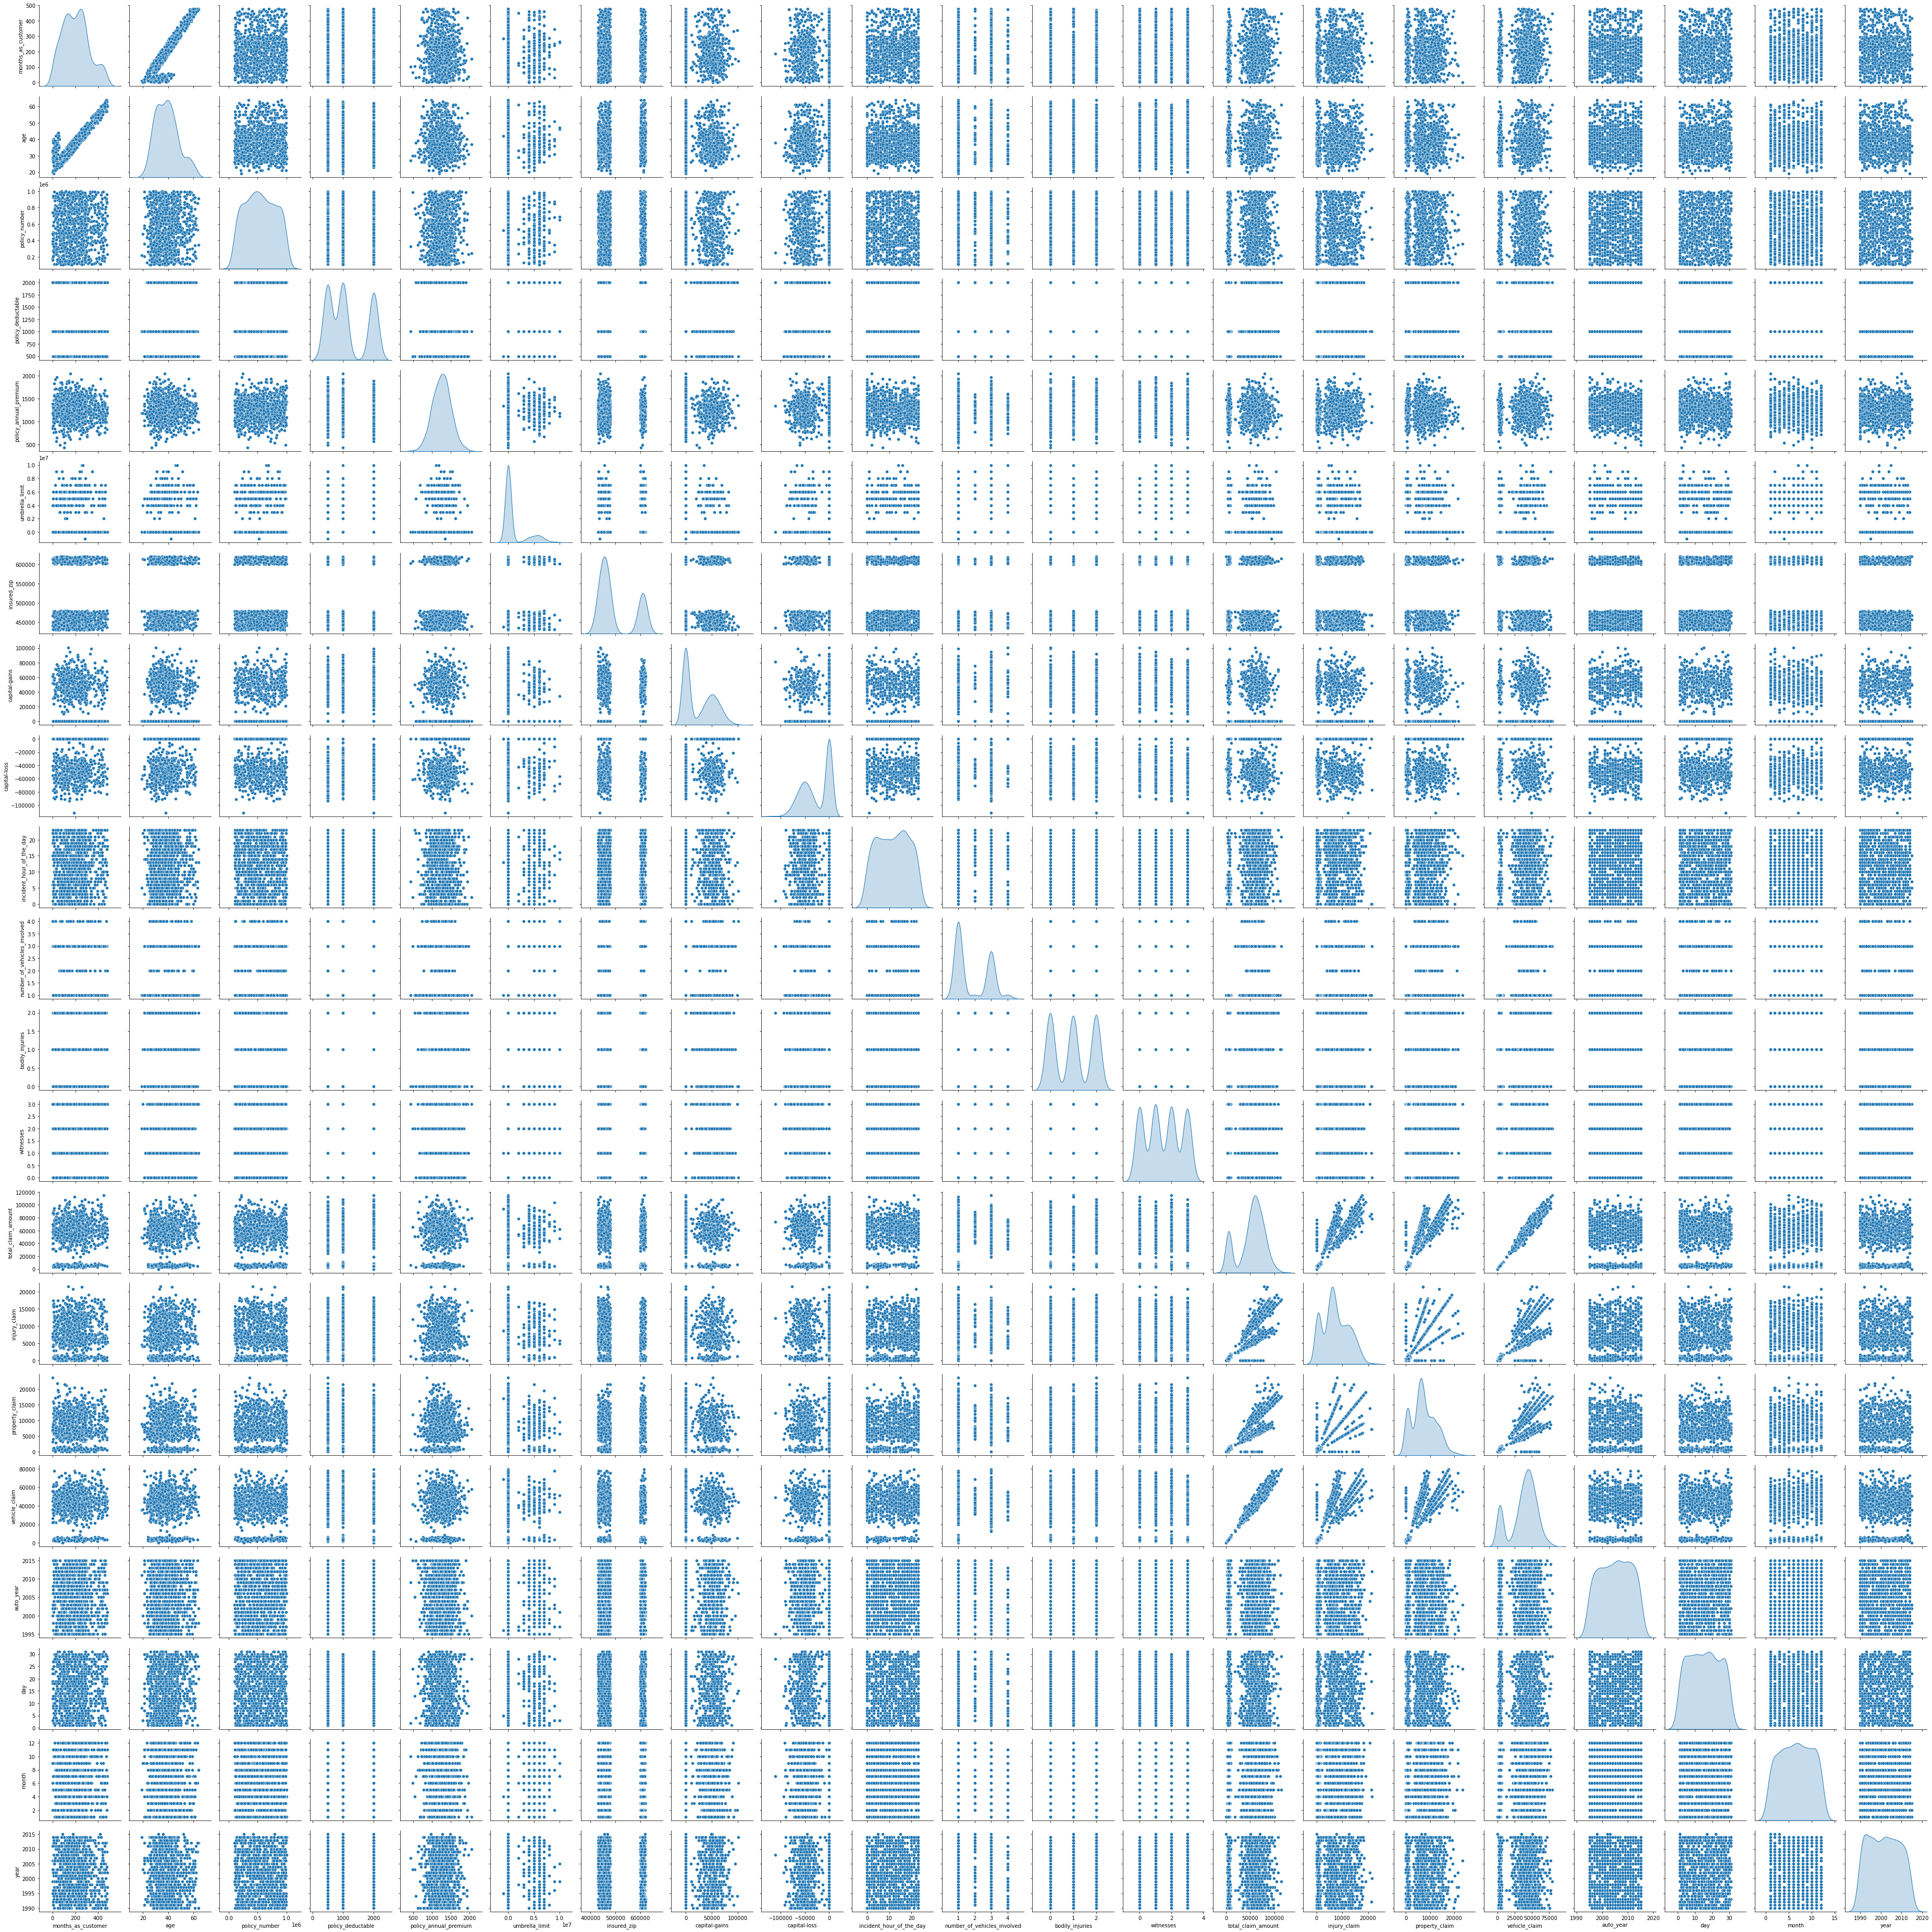

In [24]:
plt.figure(figsize = (18, 8))
sns.pairplot(data=df, diag_kind = 'kde')

to see the relation within the columns we use pairlot

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

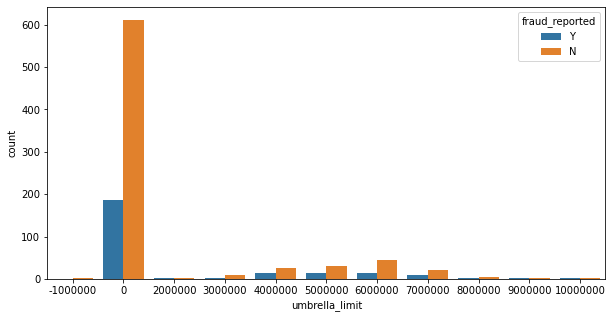

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(df.umbrella_limit,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='incident_city', ylabel='count'>

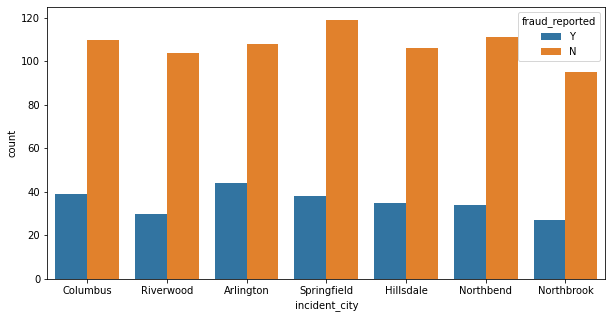

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(df.incident_city,orient='v',hue=df['fraud_reported'])

from the above graph we could assume that arington city has the highest number of fraud reported 2nd comes colombus and 3rd comes springfield.

<AxesSubplot:xlabel='incident_state', ylabel='count'>

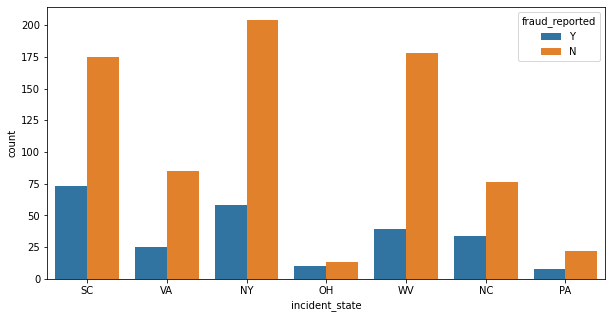

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(df.incident_state,orient='v',hue=df['fraud_reported'])

from the above graph we could assume that state SC have the highest number fraud report

<AxesSubplot:xlabel='incident_type', ylabel='count'>

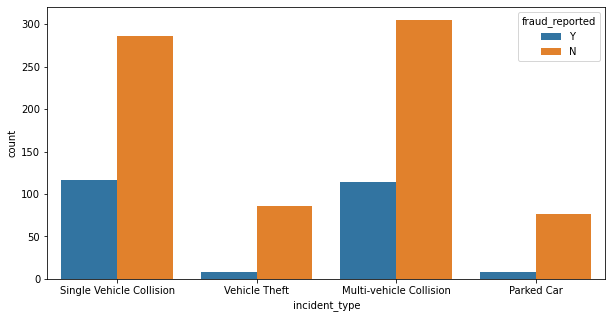

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(df.incident_type,orient='v',hue=df['fraud_reported'])

from the above graph we could assume that fraud reported for vehicle theft and parked car is ver less as compared to others

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

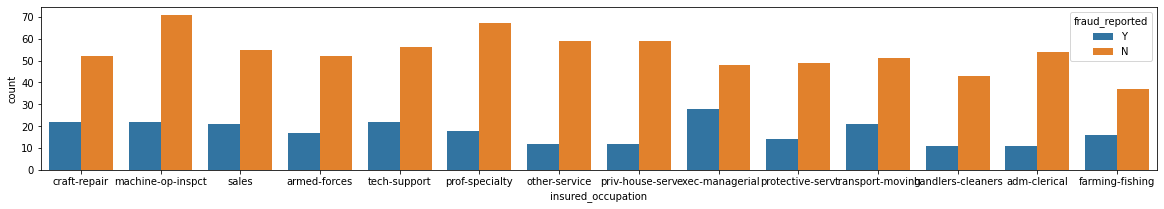

In [38]:
plt.figure(figsize=(20,3))
sns.countplot(df.insured_occupation,orient='v',hue=df['fraud_reported'])

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

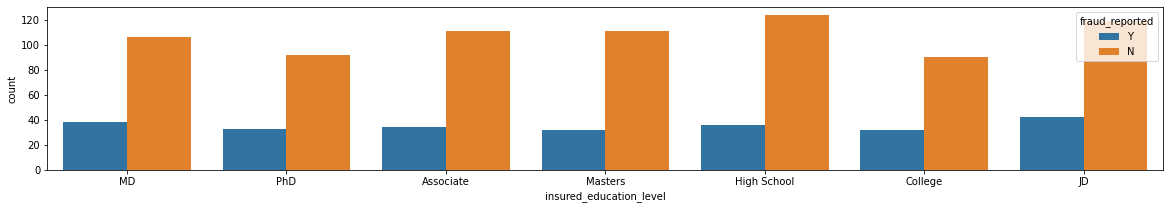

In [39]:
plt.figure(figsize=(20,3))
sns.countplot(df.insured_education_level,orient='v',hue=df['fraud_reported'])

from the above graph we could assume that high school people gets the most insurance and then JD but they dont report when fraud happens.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

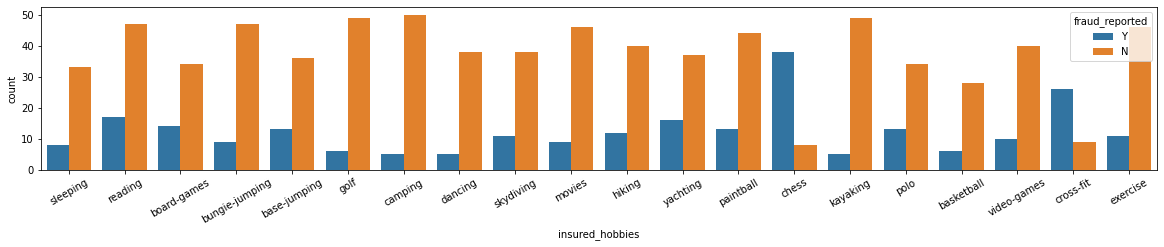

In [40]:
plt.figure(figsize=(20,3))
sns.countplot(df.insured_hobbies,orient='v',hue=df['fraud_reported'])
plt.xticks(rotation=30)

Looks like people having hobbies like playing Chess or Cross-fit have numerous frauds.

<AxesSubplot:xlabel='age', ylabel='count'>

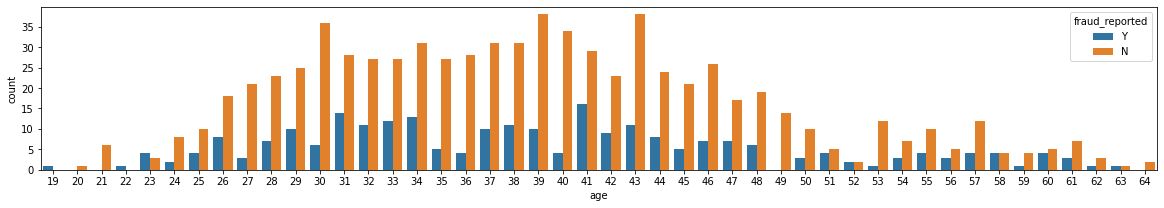

In [41]:
plt.figure(figsize=(20,3))
sns.countplot(df.age,orient='v',hue=df['fraud_reported'])

from the above graph we could assume that the people age between 30 to 43 experience frauds but dont report.

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

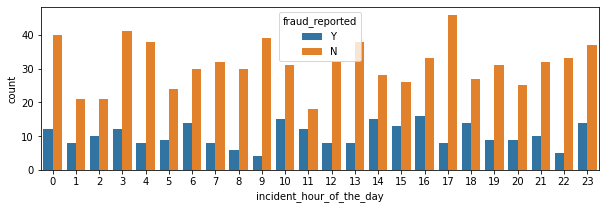

In [43]:
plt.figure(figsize=(10,3))
sns.countplot(df.incident_hour_of_the_day,orient='v',hue=df['fraud_reported'])

from the above graph we could assume that most of the frauds happens every hour and its been not reported.

In [186]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'day', 'month', 'year',
       'incident_day', 'incident_month', 'incident_year'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

cols = ['policy_state', 'insured_sex', 'auto_make', 'auto_model','fraud_reported','insured_education_level',
        'insured_occupation','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity',
       'authorities_contacted','incident_state','incident_city','policy_csl','incident_location','property_damage',
       'police_report_available',]
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                 328   48         521585             2           1   
1                 228   42         342868             1           1   
2                 134   29         687698             2           0   
3                 256   41         227811             0           1   
4                 228   44         367455             0           2   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

   insured_sex  ...  auto_make  auto_model  auto_year  fraud_reported  day  \
0            1  ...         10           1       2004               1   17   
1            1  ...          8          12       2007               1   27   
2            0  ...          4          30       2007               0    9   
3            0  ...          3          34       2014               1   25   
4            1  ...          0          31       2009               0    6   

   month  year  incident_day  incident_month  incident_year  
0     10  2014            25               1           2015  
1      6  2006            21               1           2015  
2      6  2000            22               2           2015  
3      5  1990             1              10           2015  
4      6  2014            17               2           2015  

[5 rows x 43 columns]

## Plotting outliers

months_as_customer                AxesSubplot(0.125,0.808774;0.133621x0.0712264)
age                            AxesSubplot(0.285345,0.808774;0.133621x0.0712264)
policy_number                   AxesSubplot(0.44569,0.808774;0.133621x0.0712264)
policy_state                   AxesSubplot(0.606034,0.808774;0.133621x0.0712264)
policy_csl                     AxesSubplot(0.766379,0.808774;0.133621x0.0712264)
policy_deductable                 AxesSubplot(0.125,0.723302;0.133621x0.0712264)
policy_annual_premium          AxesSubplot(0.285345,0.723302;0.133621x0.0712264)
umbrella_limit                  AxesSubplot(0.44569,0.723302;0.133621x0.0712264)
insured_zip                    AxesSubplot(0.606034,0.723302;0.133621x0.0712264)
insured_sex                    AxesSubplot(0.766379,0.723302;0.133621x0.0712264)
insured_education_level            AxesSubplot(0.125,0.63783;0.133621x0.0712264)
insured_occupation              AxesSubplot(0.285345,0.63783;0.133621x0.0712264)
insured_hobbies             

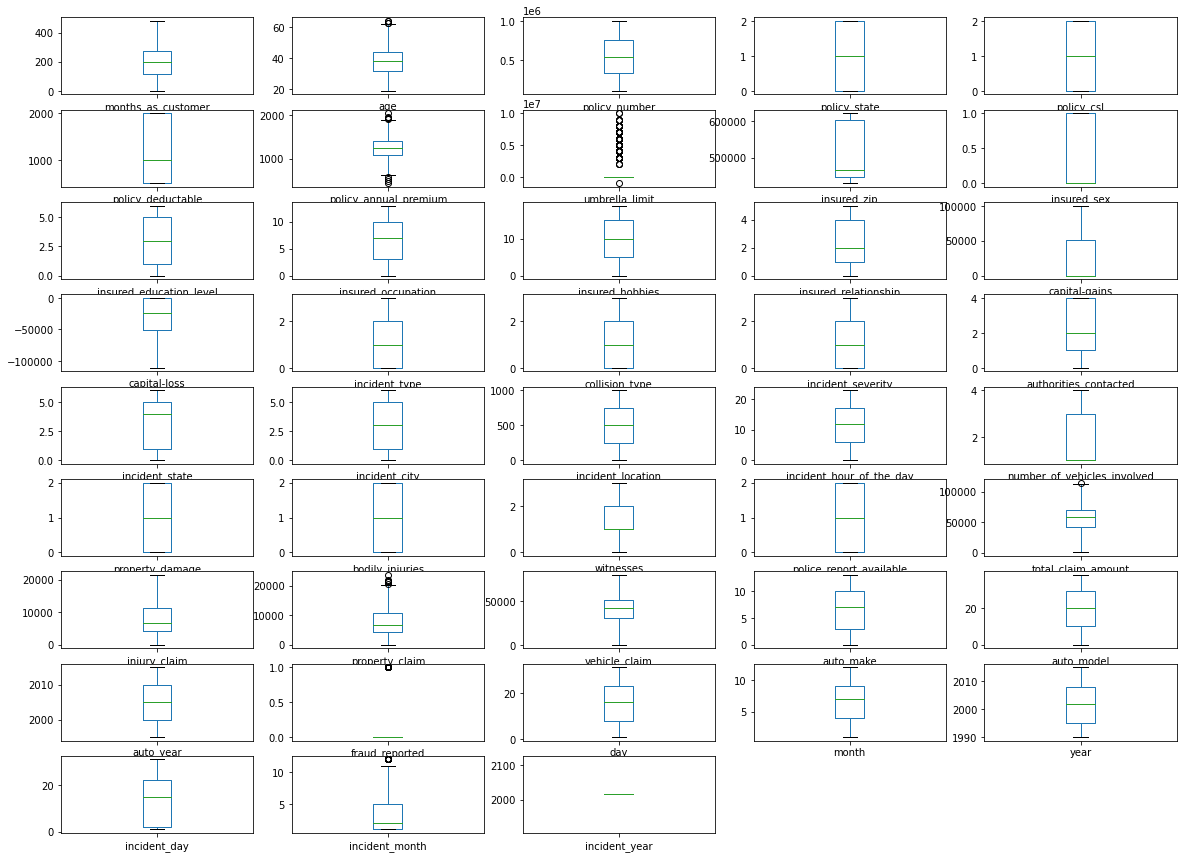

In [195]:
df.plot(kind = 'box',subplots = True,layout=(9,5),figsize = (20,15))

## Applying IQR method

In [52]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'day', 'month', 'year'],
      dtype='object')

In [13]:
col = ['property_claim','umbrella_limit','policy_annual_premium','age']
dfcontcol = df[col]

In [14]:
# finding out the quantile of data with continuous columns
Q1 = dfcontcol.quantile(0.25)
Q3 = dfcontcol.quantile(0.75)
IQR = Q3 - Q1

# removing outliers using IQR method
df_new = df[~((dfcontcol < (Q1 - 1.5 * IQR)) |(dfcontcol > (Q3 + 1.5 * IQR))).any(axis=1)]

here i tried to remove the outliers with IQR technique

In [15]:
print(df_new.shape)
print(df.shape)

(783, 43)
(1000, 43)


checking out the shape of old dataframe before removing outlier and new dataframe after removing outliers

## Check the distribution of skewness

In [17]:
df_new.skew()

months_as_customer             0.344529
age                            0.417709
policy_number                  0.026192
policy_state                  -0.045349
policy_csl                     0.112496
policy_deductable              0.460670
policy_annual_premium          0.016941
umbrella_limit                 0.000000
insured_zip                    0.864255
insured_sex                    0.161753
insured_education_level       -0.011383
insured_occupation            -0.038441
insured_hobbies               -0.066439
insured_relationship           0.149305
capital-gains                  0.460744
capital-loss                  -0.400827
incident_type                  0.123586
collision_type                 0.151841
incident_severity              0.258509
authorities_contacted         -0.103983
incident_state                -0.195671
incident_city                  0.061783
incident_location              0.007713
incident_hour_of_the_day      -0.035404
number_of_vehicles_involved    0.462792


from the above we can say that there is no skewness across the columns

<AxesSubplot:>

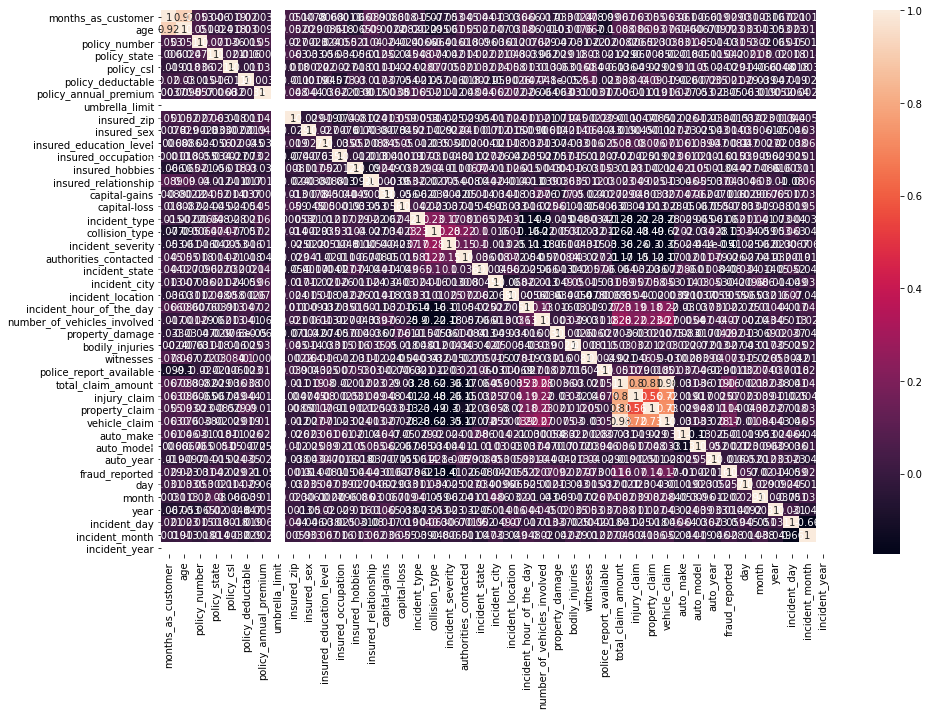

In [20]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(df_new.corr(),annot = True,robust = True)

In [21]:
df_new.drop(columns = ['auto_make','months_as_customer'],axis = 1,inplace = True)

droped the highly corelated columns

## Preprocessing

In [22]:
x = df_new.drop("fraud_reported",axis=1)
y = df_new["fraud_reported"]

In [23]:
print(x.shape)
print(y.shape)

(783, 40)
(783,)


## imbalanced data set

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

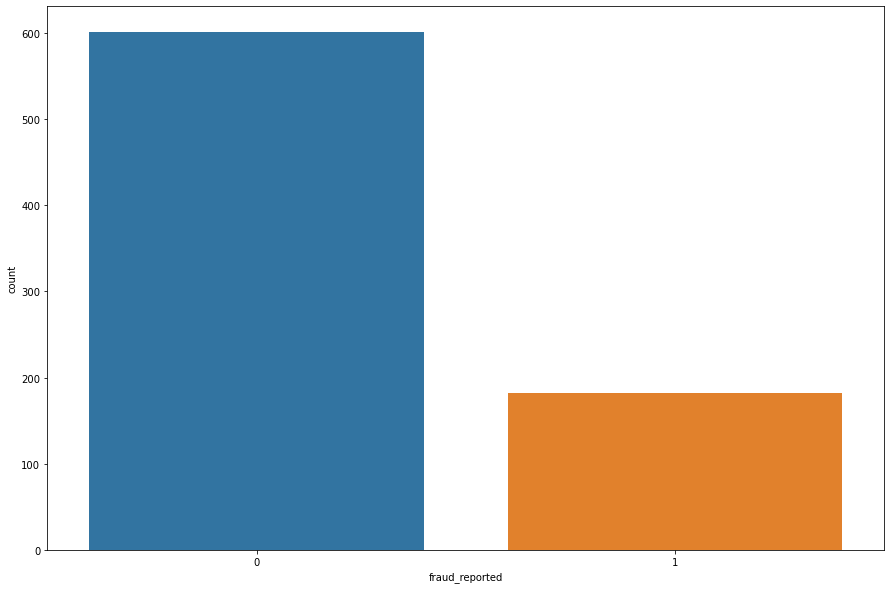

In [24]:
sns.countplot(y)

## performing PCA

here i checked is there any imbalace data in the target variable and yes there is imbalance data

In [25]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_resample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (1202, 40)
Size of y-sample : (1202, 1)


here i reduced the imbalanced data with the smote technique

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)

x = pca.fit_transform(x_sample)

here i have used pca to reduce the columns

In [27]:
# using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x_sample)

here i used standard scalar to scale the feature columns

In [28]:
from sklearn.model_selection import train_test_split
# spliting the data into train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y_sample,test_size = .20,random_state = 42)

here i split the feature variable and target variable into training and test set

## Because the target variable has catagories so we could use following models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [30]:
lr = LogisticRegression()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()

model = [lr,rfc,dt,nb]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print(i.score(x_train,y_train))
    print(i.score(x_test,y_test))
    print('Accuracy score of',i,'is',accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

0.8459937565036421
0.7966804979253111
Accuracy score of LogisticRegression() is 0.7966804979253111
[[102  26]
 [ 23  90]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       128
           1       0.78      0.80      0.79       113

    accuracy                           0.80       241
   macro avg       0.80      0.80      0.80       241
weighted avg       0.80      0.80      0.80       241

1.0
0.8713692946058091
Accuracy score of RandomForestClassifier() is 0.8713692946058091
[[111  17]
 [ 14  99]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       128
           1       0.85      0.88      0.86       113

    accuracy                           0.87       241
   macro avg       0.87      0.87      0.87       241
weighted avg       0.87      0.87      0.87       241

1.0
0.7634854771784232
Accuracy score of DecisionTreeClassifier() is 0.7634854771784232
[[97 31]
 [26 87]]
      

And i used necessary machine learning models deploid the training set and testing set and checked the accuracy

In [32]:
from sklearn.model_selection import cross_val_score
for i in model:
    score = cross_val_score(i,x_sample,y_sample,cv =7)
    print('cv score of',i,'is',score.mean())

cv score of LogisticRegression() is 0.5957529482621282
cv score of RandomForestClassifier() is 0.8670076353674885
cv score of DecisionTreeClassifier() is 0.8212100017485574
cv score of GaussianNB() is 0.5998329156223894


i used cross_validation_score to check if there is any underfitting or overfitting . Looks like RanfomForest model is giving the best score

## Hyperparameter Tuning

In [35]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4,6,8,10,15,20,24,30,35,50],
                'min_samples_split': [2, 5, 10,15,20,25,30]}
rfc= RandomForestClassifier()
clf = GridSearchCV(estimator = rfr,param_grid = parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Here i used hyperparameter tuning so that i could get the maximum accuracy

In [36]:
rfc2= RandomForestClassifier(max_depth = 90,
                           max_features = 'auto',
                           min_samples_leaf = 1,
                           min_samples_split = 2,)
rfc2.fit(x_train,y_train)
print(rfc2.score(x_train,y_train))
print(rfc2.score(x_test,y_test))

1.0
0.8713692946058091


Now Here i used the required parameter in randomforest classifier and tries to increase the accuracy

In [37]:
pred_final = rfc2.predict(x_test)
print(accuracy_score(y_test,pred_final))

0.8713692946058091


and here is our final predicting accuracy

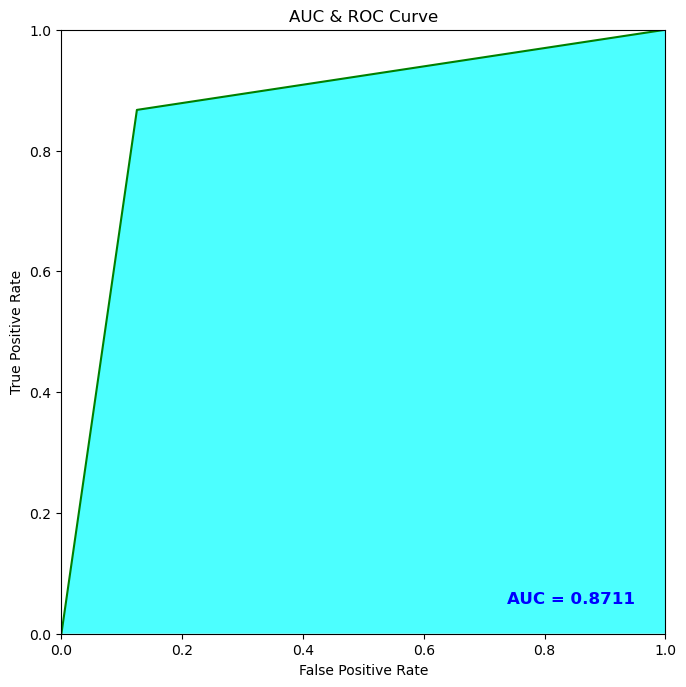

In [38]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, pred_final)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, pred_final)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='cyan', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

here i ploted the AUC & ROC CURVE

## Now we dump the final output

In [ ]:
import pickle
filename = 'insurance_claim_project.pkl'
pickle.dump(dt2,open(filename,'wb'))